In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Flatten,
    Conv2D,
    Input,
    MaxPooling2D
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1LmDJlDqGqluskYlixyQ2ocycbAILQ0kY' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1LmDJlDqGqluskYlixyQ2ocycbAILQ0kY" -O temp.zip && rm -rf /tmp/cookies.txt
!unzip temp.zip
!rm temp.zip

--2024-12-25 12:13:52--  https://docs.google.com/uc?export=download&confirm=&id=1LmDJlDqGqluskYlixyQ2ocycbAILQ0kY
Resolving docs.google.com (docs.google.com)... 173.194.212.139, 173.194.212.138, 173.194.212.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.212.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1LmDJlDqGqluskYlixyQ2ocycbAILQ0kY&export=download [following]
--2024-12-25 12:13:53--  https://drive.usercontent.google.com/download?id=1LmDJlDqGqluskYlixyQ2ocycbAILQ0kY&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.203.132, 2607:f8b0:400c:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.203.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 605960 (592K) [application/octet-stream]
Saving to: ‘temp.zip’

temp.zip            100%[===================>] 591.76K  --.-K

In [23]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [24]:
train = train_datagen.flow_from_directory(
    '/content/training_set',
    target_size=(64, 64),
    class_mode='binary'
)

Found 13 images belonging to 2 classes.


In [25]:
test = test_datagen.flow_from_directory(
    '/content/test_set',
    target_size=(64,64),
    class_mode='binary'
)

Found 6 images belonging to 2 classes.


In [26]:
model = Sequential()

model.add(Input(shape=(64,64,3)))
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 29, 29, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         200,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 202,569 (791.29 KB)

 Trainable params: 202,569 (791.29 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [34]:
model.fit(
    train,
    validation_data=test,
    epochs=10,
    batch_size=1
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 9.6660e-04
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 8.3636e-04
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 7.0517e-04
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 5.8884e-04
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 5.0254e-04
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy

In [35]:
model.evaluate(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 6.5249e-04


[0.0006524878554046154, 1.0]

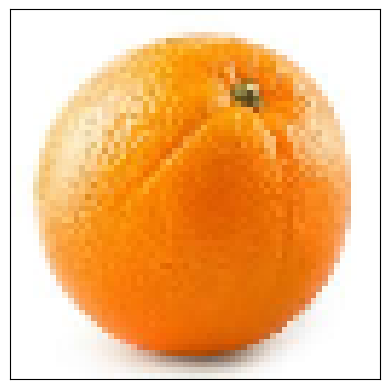

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[1.]], dtype=float32)

In [41]:
img = cv2.imread('/content/sample1.jpg')
img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
resized_image = cv2.resize(img, (64, 64))
plt.xticks([])
plt.yticks([])
plt.imshow(resized_image)
plt.show()

prediction = model.predict(resized_image.reshape(1, 64, 64, 3))
prediction

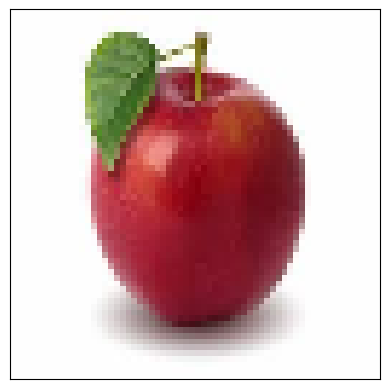

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.]], dtype=float32)

In [40]:
img = cv2.imread('/content/sample2.jpg')
img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
resized_image = cv2.resize(img, (64, 64))
plt.xticks([])
plt.yticks([])
plt.imshow(resized_image)
plt.show()

prediction = model.predict(resized_image.reshape(1, 64, 64, 3))
prediction